In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#Create an empty array to sort and organize data from multiple files

dates=pd.date_range(start="1961-03-01",end="2017-02-28",freq="D")
comp=pd.DataFrame(index=dates)
comp.index.name='Date'
print(comp)

Empty DataFrame
Columns: []
Index: [1961-03-01 00:00:00, 1961-03-02 00:00:00, 1961-03-03 00:00:00, 1961-03-04 00:00:00, 1961-03-05 00:00:00, 1961-03-06 00:00:00, 1961-03-07 00:00:00, 1961-03-08 00:00:00, 1961-03-09 00:00:00, 1961-03-10 00:00:00, 1961-03-11 00:00:00, 1961-03-12 00:00:00, 1961-03-13 00:00:00, 1961-03-14 00:00:00, 1961-03-15 00:00:00, 1961-03-16 00:00:00, 1961-03-17 00:00:00, 1961-03-18 00:00:00, 1961-03-19 00:00:00, 1961-03-20 00:00:00, 1961-03-21 00:00:00, 1961-03-22 00:00:00, 1961-03-23 00:00:00, 1961-03-24 00:00:00, 1961-03-25 00:00:00, 1961-03-26 00:00:00, 1961-03-27 00:00:00, 1961-03-28 00:00:00, 1961-03-29 00:00:00, 1961-03-30 00:00:00, 1961-03-31 00:00:00, 1961-04-01 00:00:00, 1961-04-02 00:00:00, 1961-04-03 00:00:00, 1961-04-04 00:00:00, 1961-04-05 00:00:00, 1961-04-06 00:00:00, 1961-04-07 00:00:00, 1961-04-08 00:00:00, 1961-04-09 00:00:00, 1961-04-10 00:00:00, 1961-04-11 00:00:00, 1961-04-12 00:00:00, 1961-04-13 00:00:00, 1961-04-14 00:00:00, 1961-04-15 00:00:00

In [3]:
flow=pd.read_csv('streamflow.csv',parse_dates=['Date'])
flow_wide=flow.pivot(index='Date',columns='Watershed',values='Flow (L/s)').add_suffix('SF')
print(flow_wide)

Watershed   S1SF  S2SF  S4SF  S5SF  S6SF
Date                                    
1961-03-01   0.0  0.00   NaN   NaN   NaN
1961-03-02   0.0  0.00   NaN   NaN   NaN
1961-03-03   0.0  0.00   NaN   NaN   NaN
1961-03-04   0.0  0.00   NaN   NaN   NaN
1961-03-05   0.0  0.00   NaN   NaN   NaN
...          ...   ...   ...   ...   ...
2017-02-24   NaN  1.38  4.84  1.26  0.73
2017-02-25   NaN  1.09  3.27  0.92  0.75
2017-02-26   NaN  1.08  2.46  1.68  0.69
2017-02-27   NaN  0.54  2.18  1.71  0.56
2017-02-28   NaN  0.54  2.18  1.71  0.56

[20454 rows x 5 columns]


In [4]:
comp=comp.join(flow_wide)
print(comp)

            S1SF  S2SF  S4SF  S5SF  S6SF
Date                                    
1961-03-01   0.0  0.00   NaN   NaN   NaN
1961-03-02   0.0  0.00   NaN   NaN   NaN
1961-03-03   0.0  0.00   NaN   NaN   NaN
1961-03-04   0.0  0.00   NaN   NaN   NaN
1961-03-05   0.0  0.00   NaN   NaN   NaN
...          ...   ...   ...   ...   ...
2017-02-24   NaN  1.38  4.84  1.26  0.73
2017-02-25   NaN  1.09  3.27  0.92  0.75
2017-02-26   NaN  1.08  2.46  1.68  0.69
2017-02-27   NaN  0.54  2.18  1.71  0.56
2017-02-28   NaN  0.54  2.18  1.71  0.56

[20454 rows x 5 columns]


In [5]:
wte=pd.read_csv('WTE.csv',parse_dates=['DATE'])
wte=wte.set_index('DATE').rename_axis('Date').reset_index()

wte_wide=wte.pivot(index='Date',columns='PEATLAND',values='WTE').add_suffix('WTE')
print(wte_wide)

PEATLAND     S1WTE   S2WTE   S3WTE   S4WTE   S5WTE   S6WTE
Date                                                      
1961-01-01  411.94  421.89     NaN     NaN     NaN     NaN
1961-01-02  411.94  421.89     NaN     NaN     NaN     NaN
1961-01-03  411.94  421.88     NaN     NaN     NaN     NaN
1961-01-04  411.94  421.88     NaN     NaN     NaN     NaN
1961-01-05  411.94  421.88     NaN     NaN     NaN     NaN
...            ...     ...     ...     ...     ...     ...
2020-12-27  412.15  421.88  413.66  428.50  423.49  422.68
2020-12-28  412.15  421.87  413.66  428.50  423.49  422.68
2020-12-29  412.15  421.87  413.66  428.50  423.49  422.68
2020-12-30  412.15  421.87  413.66  428.50  423.48  422.68
2020-12-31  412.14  421.87  413.66  428.49  423.48  422.68

[21915 rows x 6 columns]


In [6]:
comp=comp.join(wte_wide)
print(comp)

            S1SF  S2SF  S4SF  S5SF  S6SF   S1WTE   S2WTE   S3WTE   S4WTE  \
Date                                                                       
1961-03-01   0.0  0.00   NaN   NaN   NaN  411.47  421.64     NaN     NaN   
1961-03-02   0.0  0.00   NaN   NaN   NaN  411.47  421.63     NaN     NaN   
1961-03-03   0.0  0.00   NaN   NaN   NaN  411.47  421.63     NaN     NaN   
1961-03-04   0.0  0.00   NaN   NaN   NaN  411.46  421.63     NaN     NaN   
1961-03-05   0.0  0.00   NaN   NaN   NaN  411.46  421.63     NaN     NaN   
...          ...   ...   ...   ...   ...     ...     ...     ...     ...   
2017-02-24   NaN  1.38  4.84  1.26  0.73  412.21  421.97  413.65  428.58   
2017-02-25   NaN  1.09  3.27  0.92  0.75  412.21  421.96  413.64  428.58   
2017-02-26   NaN  1.08  2.46  1.68  0.69  412.21  421.96  413.64  428.58   
2017-02-27   NaN  0.54  2.18  1.71  0.56  412.21  421.95  413.64  428.58   
2017-02-28   NaN  0.54  2.18  1.71  0.56  412.21  421.94  413.64  428.58   

           

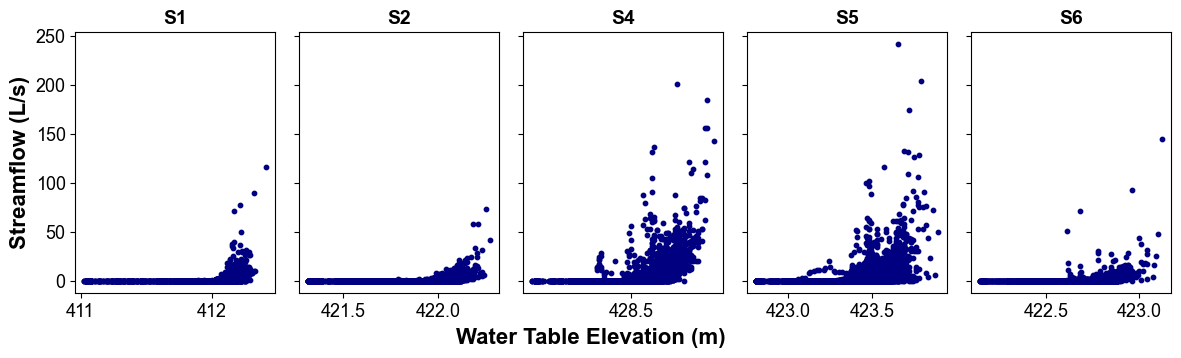

In [7]:
#Now to graph WTE vs Streamflow

from matplotlib.ticker import MultipleLocator

plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 13

fig,axes=plt.subplots(nrows=1,ncols=5,figsize=(12, 3.5),sharey=True)

mask=comp[['S1SF','S1WTE']].notna().all(axis=1)
axes[0].scatter(comp.loc[mask,'S1WTE'],comp.loc[mask,'S1SF'],s=10, color='navy')
#axes[0].set_xlabel('Water table elevation (m)', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Streamflow (L/s)', fontsize=16, fontweight='bold')
axes[0].set_title('S1',fontsize=14, fontweight='bold')

mask=comp[['S2SF','S2WTE']].notna().all(axis=1)
axes[1].scatter(comp.loc[mask,'S2WTE'],comp.loc[mask,'S2SF'],s=10, color='navy')
#axes[1].set_xlabel('Water table elevation (m)', fontsize=12, fontweight='bold')
axes[1].set_title('S2',fontsize=14, fontweight='bold')

mask=comp[['S4SF','S4WTE']].notna().all(axis=1)
axes[2].scatter(comp.loc[mask,'S4WTE'],comp.loc[mask,'S4SF'],s=10, color='navy')
axes[2].xaxis.set_major_locator(MultipleLocator(0.5))
#axes[2].set_xlabel('Water table elevation (m)', fontsize=12, fontweight='bold')
#axes[2].set_ylabel('Streamflow (L/s)', fontsize=12, fontweight='bold')
axes[2].set_title('S4',fontsize=14, fontweight='bold')

mask=comp[['S5SF','S5WTE']].notna().all(axis=1)
axes[3].scatter(comp.loc[mask,'S5WTE'],comp.loc[mask,'S5SF'],s=10, color='navy')
#axes[3].set_xlabel('Water table elevation (m)', fontsize=12, fontweight='bold')
#axes[3].set_ylabel('Streamflow (L/s)', fontsize=12, fontweight='bold')
axes[3].set_title('S5',fontsize=14, fontweight='bold')

mask=comp[['S6SF','S6WTE']].notna().all(axis=1)
axes[4].scatter(comp.loc[mask,'S6WTE'],comp.loc[mask,'S6SF'],c='navy',s=10)
#axes[4].set_xlabel('Water table elevation (m)', fontsize=12, fontweight='bold')
#axes[4].set_ylabel('Streamflow (L/s)', fontsize=12, fontweight='bold')
axes[4].set_title('S6',fontsize=14, fontweight='bold')

fig.text(0.5, 0.04, 'Water Table Elevation (m)', ha='center', fontsize=16, fontweight='bold')

#plt.suptitle('Threshold Behavior in Streamflow Response to Water Table Elevation', fontweight='bold', fontsize=18)
plt.tight_layout(rect=[0, 0.05, 1, 1.05])
plt.show()


In [8]:
#Now I need to map hysteresis. I will use years 1977, 1978, and 1979, because data exists for all watersheds during this time. I will only plot from Feb to June to capture the spring melt period.

comp['Julian Day']=comp.index.dayofyear
comp['Year']=comp.index.year

print(comp)

            S1SF  S2SF  S4SF  S5SF  S6SF   S1WTE   S2WTE   S3WTE   S4WTE  \
Date                                                                       
1961-03-01   0.0  0.00   NaN   NaN   NaN  411.47  421.64     NaN     NaN   
1961-03-02   0.0  0.00   NaN   NaN   NaN  411.47  421.63     NaN     NaN   
1961-03-03   0.0  0.00   NaN   NaN   NaN  411.47  421.63     NaN     NaN   
1961-03-04   0.0  0.00   NaN   NaN   NaN  411.46  421.63     NaN     NaN   
1961-03-05   0.0  0.00   NaN   NaN   NaN  411.46  421.63     NaN     NaN   
...          ...   ...   ...   ...   ...     ...     ...     ...     ...   
2017-02-24   NaN  1.38  4.84  1.26  0.73  412.21  421.97  413.65  428.58   
2017-02-25   NaN  1.09  3.27  0.92  0.75  412.21  421.96  413.64  428.58   
2017-02-26   NaN  1.08  2.46  1.68  0.69  412.21  421.96  413.64  428.58   
2017-02-27   NaN  0.54  2.18  1.71  0.56  412.21  421.95  413.64  428.58   
2017-02-28   NaN  0.54  2.18  1.71  0.56  412.21  421.94  413.64  428.58   

           

In [9]:
#create a mask for the years 1978-1980 and Julian Days 60-120 (March 1 to April 30)
mask_78=(comp['Year']==1978) & (comp['Julian Day']>=60) & (comp['Julian Day']<=120)
mask_79=(comp['Year']==1979) & (comp['Julian Day']>=60) & (comp['Julian Day']<=120)
mask_80=(comp['Year']==1980) & (comp['Julian Day']>=60) & (comp['Julian Day']<=120)


C:\Users\gretchenhough\AppData\Local\Temp\ipykernel_29852\1433737330.py:46: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0.05, 0.05, 1, 0.95])


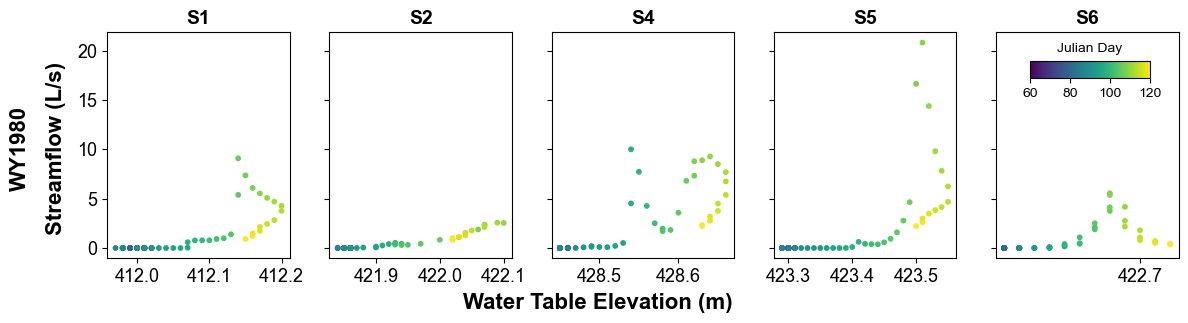

In [10]:
fig2, axes2=plt.subplots(nrows=1,ncols=5,figsize=(12, 3.5),sharey=True)

import matplotlib.colors as mcolors
from matplotlib.ticker import FormatStrFormatter

cmap=plt.get_cmap('viridis')
norm=mcolors.Normalize(vmin=comp.loc[mask_80,'Julian Day'].min(), vmax=comp.loc[mask_80,'Julian Day'].max())
colors=cmap(norm(comp.loc[mask_80,'Julian Day']))


axes2[0].scatter(comp.loc[mask_80,'S1WTE'],comp.loc[mask_80,'S1SF'],s=10, color=colors, label='1980')
axes2[0].set_title('S1',fontsize=14, fontweight='bold')
axes2[0].xaxis.set_major_locator(MultipleLocator(0.1))
axes2[1].xaxis.set_major_locator(MultipleLocator(0.1))
axes2[1].scatter(comp.loc[mask_80, 'S2WTE'],comp.loc[mask_80,'S2SF'],s=10, color=colors, label='1980')
axes2[1].set_title('S2',fontsize=14, fontweight='bold')
axes2[2].scatter(comp.loc[mask_80, 'S4WTE'],comp.loc[mask_80,'S4SF'],s=10, color=colors, label='1980')
axes2[2].xaxis.set_major_locator(MultipleLocator(0.1))
axes2[2].set_title('S4',fontsize=14, fontweight='bold')
axes2[3].scatter(comp.loc[mask_80, 'S5WTE'],comp.loc[mask_80,'S5SF'],s=10, color=colors, label='1980')
axes2[3].set_title('S5',fontsize=14, fontweight='bold')
axes2[3].xaxis.set_major_locator(MultipleLocator(0.1))
axes2[3].ticklabel_format(axis='x', style='plain', useOffset=False)
axes2[4].scatter(comp.loc[mask_80, 'S6WTE'],comp.loc[mask_80,'S6SF'],s=10, color=colors, label='1980')
axes2[4].set_title('S6',fontsize=14, fontweight='bold')
axes2[4].ticklabel_format(axis='x', style='plain', useOffset=False)
axes2[4].xaxis.set_major_locator(MultipleLocator(0.1))


sm=plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Only needed for older versions of matplotlib


cbar_ax=fig2.add_axes([0.86, 0.70, 0.1, 0.05])
cbar=fig2.colorbar(sm, cax=cbar_ax, orientation='horizontal')
cbar_ax.set_title('Julian Day', fontsize=10)
cbar.ax.tick_params(labelsize=10)
cbar.set_ticks([60, 80, 100, 120])




fig2.text(0.5, 0.04, 'Water Table Elevation (m)', ha='center', fontsize=16, fontweight='bold')
fig2.text(0.04, 0.5, 'Streamflow (L/s)', va='center', rotation='vertical', fontsize=16, fontweight='bold')
fig2.text(0.01, 0.5, 'WY1980', va='center',rotation='vertical',fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0.05, 0.05, 1, 0.95])
plt.show()

C:\Users\gretchenhough\AppData\Local\Temp\ipykernel_29852\1833420553.py:30: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0.05, 0.05, 1, 0.95])


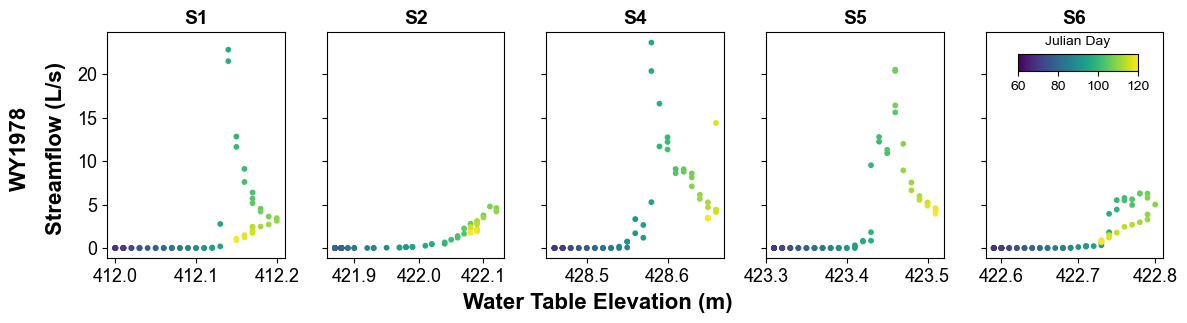

In [11]:
fig,ax=plt.subplots(nrows=1,ncols=5,figsize=(12, 3.5),sharey=True)

ax[0].scatter(comp.loc[mask_78,'S1WTE'],comp.loc[mask_78,'S1SF'],s=10, color=colors, label='1978')
ax[0].set_title('S1',fontsize=14, fontweight='bold')
ax[0].xaxis.set_major_locator(MultipleLocator(0.1))
ax[1].scatter(comp.loc[mask_78,'S2WTE'],comp.loc[mask_78,'S2SF'],s=10, color=colors, label='1978')
ax[1].set_title('S2',fontsize=14, fontweight='bold')
ax[1].xaxis.set_major_locator(MultipleLocator(0.1))
ax[2].scatter(comp.loc[mask_78,'S4WTE'],comp.loc[mask_78,'S4SF'],s=10, color=colors, label='1978')
ax[2].set_title('S4',fontsize=14, fontweight='bold')
ax[2].xaxis.set_major_locator(MultipleLocator(0.1))
ax[3].scatter(comp.loc[mask_78,'S5WTE'],comp.loc[mask_78,'S5SF'],s=10, color=colors, label='1978')
ax[3].set_title('S5',fontsize=14, fontweight='bold')
ax[3].xaxis.set_major_locator(MultipleLocator(0.1))
ax[3].ticklabel_format(axis='x', style='plain', useOffset=False)
ax[4].scatter(comp.loc[mask_78,'S6WTE'],comp.loc[mask_78,'S6SF'],s=10, color=colors, label='1978')
ax[4].set_title('S6',fontsize=14, fontweight='bold')
ax[4].xaxis.set_major_locator(MultipleLocator(0.1))
#ax[4].ticklabel_format(axis='x', style='plain', useOffset=False)

cbar_ax=fig.add_axes([0.85, 0.72, 0.1, 0.05])
cbar=fig.colorbar(sm, cax=cbar_ax, orientation='horizontal')
cbar.ax.tick_params(labelsize=10)
cbar.set_ticks([60, 80, 100, 120])
cbar_ax.set_title('Julian Day', fontsize=10)

fig.text(0.5, 0.04, 'Water Table Elevation (m)', ha='center', fontsize=16, fontweight='bold')
fig.text(0.04, 0.5, 'Streamflow (L/s)', va='center', rotation='vertical', fontsize=16, fontweight='bold')
fig.text(0.01, 0.5, 'WY1978', va='center',rotation='vertical',fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0.05, 0.05, 1, 0.95])
plt.show()


C:\Users\gretchenhough\AppData\Local\Temp\ipykernel_29852\3542789472.py:30: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0.05, 0.05, 1, 0.95])


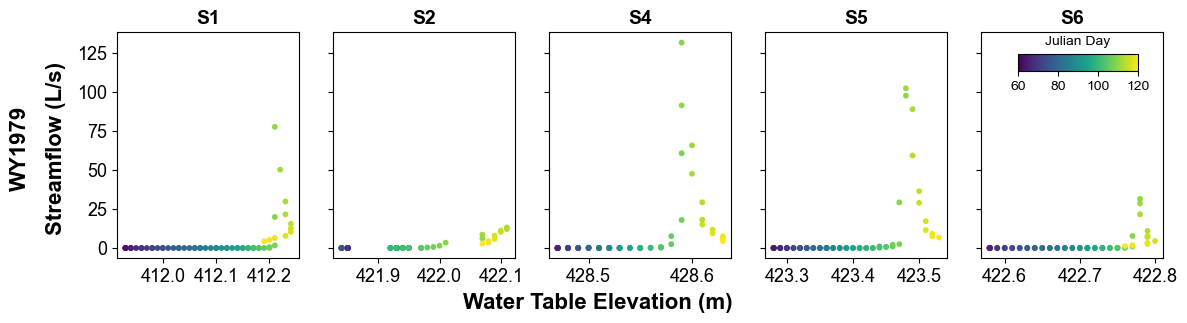

In [12]:
fig,ax=plt.subplots(nrows=1,ncols=5,figsize=(12, 3.5),sharey=True)

ax[0].scatter(comp.loc[mask_79,'S1WTE'],comp.loc[mask_79,'S1SF'],s=10, color=colors, label='1979')
ax[0].set_title('S1',fontsize=14, fontweight='bold')
ax[0].xaxis.set_major_locator(MultipleLocator(0.1))
ax[1].scatter(comp.loc[mask_79,'S2WTE'],comp.loc[mask_79,'S2SF'],s=10, color=colors, label='1979')
ax[1].set_title('S2',fontsize=14, fontweight='bold')
ax[1].xaxis.set_major_locator(MultipleLocator(0.1))
ax[2].scatter(comp.loc[mask_79,'S4WTE'],comp.loc[mask_79,'S4SF'],s=10, color=colors, label='1979')
ax[2].set_title('S4',fontsize=14, fontweight='bold')
ax[2].xaxis.set_major_locator(MultipleLocator(0.1))
ax[3].scatter(comp.loc[mask_79,'S5WTE'],comp.loc[mask_79,'S5SF'],s=10, color=colors, label='1979')
ax[3].set_title('S5',fontsize=14, fontweight='bold')
ax[3].xaxis.set_major_locator(MultipleLocator(0.1))
ax[3].ticklabel_format(axis='x', style='plain', useOffset=False)
ax[4].scatter(comp.loc[mask_79,'S6WTE'],comp.loc[mask_79,'S6SF'],s=10, color=colors, label='1979')
ax[4].set_title('S6',fontsize=14, fontweight='bold')
ax[4].xaxis.set_major_locator(MultipleLocator(0.1))
#ax[4].ticklabel_format(axis='x', style='plain', useOffset=False)

cbar_ax=fig.add_axes([0.85, 0.72, 0.1, 0.05])
cbar=fig.colorbar(sm, cax=cbar_ax, orientation='horizontal')
cbar.ax.tick_params(labelsize=10)
cbar.set_ticks([60, 80, 100, 120])
cbar_ax.set_title('Julian Day', fontsize=10)

fig.text(0.5, 0.04, 'Water Table Elevation (m)', ha='center', fontsize=16, fontweight='bold')
fig.text(0.04, 0.5, 'Streamflow (L/s)', va='center', rotation='vertical', fontsize=16, fontweight='bold')
fig.text(0.01, 0.5, 'WY1979', va='center',rotation='vertical',fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0.05, 0.05, 1, 0.95])
plt.show()

In [ ]:
#Now I want to look at hysteresis at a single site over several years with varying frost thickness and duration. The only frost data corresponds to S2. I have selected the following years based on frost thickness and duration: 1985 (high frost, early melt), 1989 (low frost, early melt), 1997 (no frost), 2003 (high frost, late melt), 2016 (medium frost, late melt).
#I'm going to need an extended window (Julian days 32-166, Feb 1 to June 15)
mask_85=(comp['Year']==1985) & (comp['Julian Day']>=32) & (comp['Julian Day']<=166)
mask_89=(comp['Year']==1989) & (comp['Julian Day']>=32) & (comp['Julian Day']<=166)
mask_97=(comp['Year']==1997) & (comp['Julian Day']>=32) & (comp['Julian Day']<=166)
mask_07=(comp['Year']==2007) & (comp['Julian Day']>=32) & (comp['Julian Day']<=166)
mask_16=(comp['Year']==2016) & (comp['Julian Day']>=32) & (comp['Julian Day']<=166)

cmap=plt.get_cmap('viridis')
norm=mcolors.Normalize(vmin=comp.loc[mask_85,'Julian Day'].min(), vmax=comp.loc[mask_85,'Julian Day'].max())
colors=cmap(norm(comp.loc[mask_85,'Julian Day']))
sm=plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Only needed for older versions of matplotlib

fig,ax=plt.subplots(nrows=1,ncols=5,figsize=(12, 3.5),sharey=True)

ax[0].scatter(comp.loc[mask_85,'S5WTE'],comp.loc[mask_85,'S5SF'],s=10, color=colors, label='1985')
ax[0].set_title('1985',fontsize=14, fontweight='bold')
#ax[0].xaxis.set_major_locator(MultipleLocator(0.1))
ax[1].scatter(comp.loc[mask_89,'S5WTE'],comp.loc[mask_89,'S5SF'],s=10, color=colors, label='1989')
ax[1].set_title('1989',fontsize=14, fontweight='bold')
#ax[1].xaxis.set_major_locator(MultipleLocator(0.1))
ax[2].scatter(comp.loc[mask_97,'S5WTE'],comp.loc[mask_97,'S5SF'],s=10, color=colors, label='1997')
ax[2].set_title('1997',fontsize=14, fontweight='bold')
#ax[2].xaxis.set_major_locator(MultipleLocator(0.1))
ax[3].scatter(comp.loc[mask_07,'S5WTE'],comp.loc[mask_07,'S5SF'],s=10, color=colors, label='2007')
ax[3].set_title('2007',fontsize=14, fontweight='bold')
#ax[3].xaxis.set_major_locator(MultipleLocator(0.1))
#ax[3].ticklabel_format(axis='x', style='plain', useOffset=False)
ax[4].scatter(comp.loc[mask_16,'S5WTE'],comp.loc[mask_16,'S5SF'],s=10, color=colors, label='2016')
ax[4].set_title('2016',fontsize=14, fontweight='bold')
#ax[4].xaxis.set_major_locator(MultipleLocator(0.1))
#ax[4].ticklabel_format(axis='x', style='plain', useOffset=False)

cbar_ax=fig.add_axes([0.85, 0.72, 0.1, 0.05])
cbar=fig.colorbar(sm, cax=cbar_ax, orientation='horizontal')
cbar.ax.tick_params(labelsize=10)
cbar.set_ticks([32, 76, 121, 166])
cbar_ax.set_title('Julian Day', fontsize=10)
fig.text(0.5, 0.04, 'Water Table Elevation (m)', ha='center', fontsize=16, fontweight='bold')
fig.text(0.04, 0.5, 'Streamflow (L/s)', va='center', rotation='vertical', fontsize=16, fontweight='bold')
fig.text(0.01, 0.5, 'S5', va='center',rotation='vertical',fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0.05, 0.05, 1, 0.95])
plt.show()

In [ ]:
#Now I want to look at hysteresis at a single site over several years with varying frost thickness and duration. The only frost data corresponds to S2. I have selected the following years based on frost thickness and duration: 1985 (high frost, early melt), 1989 (low frost, early melt), 1997 (no frost), 2003 (high frost, late melt), 2016 (medium frost, late melt).
#I'm going to need an extended window (Julian days 32-166, Feb 1 to June 15)
mask_85=(comp['Year']==1985) & (comp['Julian Day']>=60) & (comp['Julian Day']<=120)
mask_89=(comp['Year']==1989) & (comp['Julian Day']>=60) & (comp['Julian Day']<=120)
mask_97=(comp['Year']==1997) & (comp['Julian Day']>=60) & (comp['Julian Day']<=120)
mask_07=(comp['Year']==2007) & (comp['Julian Day']>=60) & (comp['Julian Day']<=120)
mask_16=(comp['Year']==2016) & (comp['Julian Day']>=60) & (comp['Julian Day']<=120)

cmap=plt.get_cmap('viridis')
norm=mcolors.Normalize(vmin=comp.loc[mask_85,'Julian Day'].min(), vmax=comp.loc[mask_85,'Julian Day'].max())
colors=cmap(norm(comp.loc[mask_85,'Julian Day']))
sm=plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Only needed for older versions of matplotlib

fig,ax=plt.subplots(nrows=1,ncols=5,figsize=(12, 3.5),sharey=True)

ax[0].scatter(comp.loc[mask_85,'S5WTE'],comp.loc[mask_85,'S5SF'],s=10, color=colors, label='1985')
ax[0].set_title('1985',fontsize=14, fontweight='bold')
ax[0].xaxis.set_major_locator(MultipleLocator(0.2))
ax[1].scatter(comp.loc[mask_89,'S5WTE'],comp.loc[mask_89,'S5SF'],s=10, color=colors, label='1989')
ax[1].set_title('1989',fontsize=14, fontweight='bold')
ax[1].xaxis.set_major_locator(MultipleLocator(0.2))
ax[2].scatter(comp.loc[mask_97,'S5WTE'],comp.loc[mask_97,'S5SF'],s=10, color=colors, label='1997')
ax[2].set_title('1997',fontsize=14, fontweight='bold')
ax[2].xaxis.set_major_locator(MultipleLocator(0.2))
ax[3].scatter(comp.loc[mask_07,'S5WTE'],comp.loc[mask_07,'S5SF'],s=10, color=colors, label='2007')
ax[3].set_title('2007',fontsize=14, fontweight='bold')
ax[3].xaxis.set_major_locator(MultipleLocator(0.3))
ax[3].ticklabel_format(axis='x', style='plain', useOffset=False)
ax[4].scatter(comp.loc[mask_16,'S5WTE'],comp.loc[mask_16,'S5SF'],s=10, color=colors, label='2016')
ax[4].set_title('2016',fontsize=14, fontweight='bold')
ax[4].xaxis.set_major_locator(MultipleLocator(0.1))
ax[4].ticklabel_format(axis='x', style='plain', useOffset=False)

cbar_ax=fig.add_axes([0.85, 0.72, 0.1, 0.05])
cbar=fig.colorbar(sm, cax=cbar_ax, orientation='horizontal')
cbar.ax.tick_params(labelsize=10)
cbar.set_ticks([60, 80, 100, 120])
cbar_ax.set_title('Julian Day', fontsize=10)
fig.text(0.5, 0.04, 'Water Table Elevation (m)', ha='center', fontsize=16, fontweight='bold')
fig.text(0.04, 0.5, 'Streamflow (L/s)', va='center', rotation='vertical', fontsize=16, fontweight='bold')
fig.text(0.01, 0.5, 'S5', va='center',rotation='vertical',fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0.05, 0.05, 1, 0.95])
plt.show()

In [ ]:
#Now I need plots for every year at S5 showing streamflow and WTE over time. I'm redefining the masks in case I want to change the time window.

mask_78=(comp['Year']==1978) & (comp['Julian Day']>=60) & (comp['Julian Day']<=120)
mask_79=(comp['Year']==1979) & (comp['Julian Day']>=60) & (comp['Julian Day']<=120)
mask_80=(comp['Year']==1980) & (comp['Julian Day']>=60) & (comp['Julian Day']<=120)
mask_85=(comp['Year']==1985) & (comp['Julian Day']>=60) & (comp['Julian Day']<=120)
mask_89=(comp['Year']==1989) & (comp['Julian Day']>=60) & (comp['Julian Day']<=120)
mask_97=(comp['Year']==1997) & (comp['Julian Day']>=60) & (comp['Julian Day']<=120)
mask_07=(comp['Year']==2007) & (comp['Julian Day']>=60) & (comp['Julian Day']<=120)
mask_16=(comp['Year']==2016) & (comp['Julian Day']>=60) & (comp['Julian Day']<=120)

mask_all=(mask_78|mask_79|mask_80|mask_85|mask_89|mask_97|mask_07|mask_16)

sfmin=comp.loc[mask_all,'S5SF'].min()
sfmax=comp.loc[mask_all,'S5SF'].max()
wtmin=comp.loc[mask_all, 'S5WTE'].min()
wtmax=comp.loc[mask_all, 'S5WTE'].max()



fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(15, 8), sharex=True)

ax2=np.empty_like(ax)
for i in range(2):
    for j in range(4):
        ax2[i, j] = ax[i, j].twinx()

        #inside the loop if I want the y-axes to all match and only be labeled on the boarder
        #ax[i,j].set_ylim(sfmin,sfmax)
        #ax2[i,j].set_ylim(wtmin,wtmax)

        #if j==0:
         #   ax[i,j].set_ylabel('Streamflow (L/s)', fontsize=12, fontweight='bold')
        #else:
         #   ax[i,j].set_yticklabels([])

        #if j==3:
         #   ax2[i,j].set_ylabel('Streamflow (L/s)', fontsize=12, fontweight='bold')
        #else:
         #   ax2[i,j].set_yticklabels([])

ax[0, 0].plot(comp.loc[mask_78, 'Julian Day'], comp.loc[mask_78, 'S5SF'], color='navy', label='Streamflow')
ax2[0,0].plot(comp.loc[mask_78, 'Julian Day'], comp.loc[mask_78, 'S5WTE'], color='firebrick', ls='--', label='Water table')
ax[0, 0].set_title('1978')
ax[0, 0].set_ylabel('Streamflow (L/s)', fontsize=14, fontweight='bold')
#ax2[0, 0].set_ylabel('Water Table Elevation (m)', fontsize=12, fontweight='bold')
ax[0, 1].plot(comp.loc[mask_79, 'Julian Day'], comp.loc[mask_79, 'S5SF'], color='navy')
ax2[0, 1].plot(comp.loc[mask_79, 'Julian Day'], comp.loc[mask_79, 'S5WTE'], color='firebrick', ls='--')
#ax[0, 1].set_ylabel('Streamflow (L/s)', fontsize=12, fontweight='bold')
#ax2[0, 1].set_ylabel('Water Table Elevation (m)', fontsize=12, fontweight='bold')
ax[0, 1].set_title('1979')
ax[0, 2].plot(comp.loc[mask_80, 'Julian Day'], comp.loc[mask_80, 'S5SF'], color='navy')
ax2[0, 2].plot(comp.loc[mask_80, 'Julian Day'], comp.loc[mask_80, 'S5WTE'], color='firebrick', ls='--')
#ax[0, 2].set_ylabel('Streamflow (L/s)', fontsize=12, fontweight='bold')
#ax2[0, 2].set_ylabel('Water Table Elevation (m)', fontsize=12, fontweight='bold')
ax[0, 2].set_title('1980')
ax[0, 3].plot(comp.loc[mask_85, 'Julian Day'], comp.loc[mask_85, 'S5SF'], color='navy')
ax2[0, 3].plot(comp.loc[mask_85, 'Julian Day'], comp.loc[mask_85, 'S5WTE'], color='firebrick', ls='--')
#ax[0, 3].set_ylabel('Streamflow (L/s)', fontsize=12, fontweight='bold')
ax2[0, 3].set_ylabel('Water Table Elevation (m)', fontsize=14, fontweight='bold')
ax[0, 3].set_title('1985')
ax[1, 0].plot(comp.loc[mask_89, 'Julian Day'], comp.loc[mask_89, 'S5SF'], color='navy')
ax2[1, 0].plot(comp.loc[mask_89, 'Julian Day'], comp.loc[mask_89, 'S5WTE'], color='firebrick', ls='--')
ax[1, 0].set_ylabel('Streamflow (L/s)', fontsize=14, fontweight='bold')
#ax2[1, 0].set_ylabel('Water Table Elevation (m)', fontsize=12, fontweight='bold')
ax[1, 0].set_title('1989')
ax[1, 1].plot(comp.loc[mask_97, 'Julian Day'], comp.loc[mask_97, 'S5SF'], color='navy')
ax2[1, 1].plot(comp.loc[mask_97, 'Julian Day'], comp.loc[mask_97, 'S5WTE'], color='firebrick', ls='--')
#ax[1, 1].set_ylabel('Streamflow (L/s)', fontsize=12, fontweight='bold')
#ax2[1, 1].set_ylabel('Water Table Elevation (m)', fontsize=12, fontweight='bold')
ax[1, 1].set_title('1997')
ax[1, 2].plot(comp.loc[mask_07, 'Julian Day'], comp.loc[mask_07, 'S5SF'], color='navy')
ax2[1, 2].plot(comp.loc[mask_07, 'Julian Day'], comp.loc[mask_07, 'S5WTE'], color='firebrick', ls='--')
#ax[1, 2].set_ylabel('Streamflow (L/s)', fontsize=12, fontweight='bold')
#ax2[1, 2].set_ylabel('Water Table Elevation (m)', fontsize=12, fontweight='bold')
ax[1, 2].set_title('2007')
ax[1, 3].plot(comp.loc[mask_16, 'Julian Day'], comp.loc[mask_16, 'S5SF'], color='navy')
ax2[1, 3].plot(comp.loc[mask_16, 'Julian Day'], comp.loc[mask_16, 'S5WTE'], color='firebrick', ls='--')
#ax[1, 3].set_ylabel('Streamflow (L/s)', fontsize=12, fontweight='bold')
ax2[1, 3].set_ylabel('Water Table Elevation (m)', fontsize=14, fontweight='bold')
ax[1, 3].set_title('2016')
fig.text(0.5, 0.04, 'Julian Day', ha='center', fontsize=16, fontweight='bold')


ax[0,0].legend(loc="upper right", bbox_to_anchor=(0.6, 0.95), fontsize=10)
ax2[0,0].legend(loc='upper right',bbox_to_anchor=(0.6,0.85), fontsize=10)

plt.tight_layout(rect=[0.05, 0.05, 1, 0.95])
plt.show()